### 2 - PRE - PROCESSAMENTO - BAG OF WORDS, VETORIZAÇÃO E SELEÇÃO DE CARACTERÍSTICAS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
# CARREGANDO ARQUIVO
df_content_ternario = pd.read_csv('df_content_ternario.csv')

####  BAG OF WORDS E VETORIZAÇÃO: COUNT VECTORIZER

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from joblib import dump, load

In [5]:
# CRIANDO BAG OF WORDS
count_vectorizer = CountVectorizer(ngram_range = (1,1))
matriz = count_vectorizer.fit_transform(df_content_ternario.passo6)

In [6]:
variaveis = count_vectorizer.get_feature_names()
variaveis

['ab',
 'abacate',
 'abache',
 'abachei',
 'abagem',
 'abaicha',
 'abaicou',
 'abaixacem',
 'abaixar',
 'abaju',
 'abajur',
 'abalar',
 'abanar',
 'abandoba',
 'abandonar',
 'abandonoram',
 'abar',
 'abarcar',
 'abastecer',
 'abastecimento',
 'abater',
 'abatery',
 'abatido',
 'abatimento',
 'abaurdos',
 'abaxa',
 'abaxando',
 'abaxar',
 'abaxarem',
 'abaxem',
 'abcd',
 'abcdef',
 'abcdfg',
 'abcdm',
 'abcs',
 'abdominal',
 'abdominoplastia',
 'abdurdas',
 'abedilson',
 'abeir',
 'abel',
 'abelhar',
 'abencoar',
 'abenda',
 'abensoai',
 'aberracao',
 'abertamente',
 'aberto',
 'abertura',
 'abesa',
 'abestado',
 'abg',
 'abil',
 'abilidade',
 'abilide',
 'abilita',
 'abilitada',
 'abirirdo',
 'abismar',
 'abisudo',
 'abisurd',
 'abisurdamente',
 'abisurdas',
 'abitimento',
 'abixem',
 'abjeto',
 'abner',
 'abnt',
 'aboborar',
 'abobrinha',
 'abocanhar',
 'aboixa',
 'abolir',
 'abominar',
 'abominavel',
 'abonar',
 'abordar',
 'abordativas',
 'aborei',
 'aborrecedor',
 'aborrecer',
 'ab

In [7]:
vocabulario = count_vectorizer.vocabulary_
vocabulario

{'pros': 28205,
 'comparar': 6861,
 'aplicativo': 1975,
 'concorrente': 7300,
 'longe': 20775,
 'melhor': 21858,
 'levar': 20328,
 'intuitivo': 19074,
 'palavra': 25253,
 'chave': 5889,
 'costumar': 8229,
 'funcionar': 16234,
 'aparecer': 1820,
 'umar': 35025,
 'opcao': 24632,
 'nado': 23157,
 'pesquisar': 26298,
 'contra': 7889,
 'montar': 22679,
 'lista': 20536,
 'desejo': 9894,
 'colocar': 6628,
 'item': 19361,
 'nela': 23438,
 'minimo': 22382,
 'poder': 26764,
 'fazer': 15081,
 'receber': 29390,
 'notificacao': 23877,
 'ver': 35796,
 'email': 12166,
 'produto': 27939,
 'baixar': 3430,
 'grande': 16910,
 'saldoes': 31227,
 'ofertar': 24340,
 'relampago': 29951,
 'srou': 32776,
 'acompanhar': 377,
 'simplesmente': 32215,
 'buga': 4549,
 'favor': 15022,
 'rever': 30695,
 'algum': 1103,
 'problema': 27817,
 'ex': 14246,
 'navegacao': 23327,
 'entrar': 12943,
 'apertar': 1912,
 'imagem': 17784,
 'bug': 4548,
 'abrir': 119,
 'nao': 23213,
 'voltar': 36260,
 'tela': 33570,
 'inicial': 186

In [8]:
print(matriz[0:10].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
matriz.shape

(316911, 37022)

### 3 - SELEÇÃO DE VARIÁVEIS

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

In [11]:
# SELEÇÃO DE K VARIÁVEIS
selectkbest = SelectKBest(chi2, k = 30000)
selectkbest.fit_transform(matriz, df_content_ternario.sentimento)

<316911x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 2946318 stored elements in Compressed Sparse Row format>

In [12]:
# EXTRAÇÃO DO ÍNDICE DE COLUNA DAS MELHORES VARIÁVEIS
indices = selectkbest.get_support(indices = True)

In [13]:
# CRIAÇÃO DE UMA LISTA COM O NOME DAS MELHORES VARIÁVEIS 
melhores_variaveis = [variaveis[x] for x in indices]
melhores_variaveis

['abacate',
 'abaicou',
 'abaixacem',
 'abaixar',
 'abajur',
 'abanar',
 'abandonar',
 'abar',
 'abarcar',
 'abastecer',
 'abastecimento',
 'abater',
 'abatido',
 'abatimento',
 'abaxa',
 'abaxando',
 'abaxar',
 'abaxem',
 'abcd',
 'abdominal',
 'abdurdas',
 'abeir',
 'abelhar',
 'abencoar',
 'aberracao',
 'abertamente',
 'aberto',
 'abertura',
 'abil',
 'abilidade',
 'abilide',
 'abilitada',
 'abismar',
 'abisudo',
 'abisurd',
 'abisurdamente',
 'abisurdas',
 'abitimento',
 'abjeto',
 'abner',
 'abnt',
 'aboixa',
 'abolir',
 'abominar',
 'abominavel',
 'abonar',
 'abordar',
 'aborrecer',
 'aborrecido',
 'aborrecimento',
 'abortar',
 'abosta',
 'about',
 'abracao',
 'abracar',
 'abraco',
 'abragencia',
 'abrangente',
 'abrangido',
 'abrangiu',
 'abrar',
 'abrasil',
 'abrcs',
 'abrenao',
 'abreu',
 'abreviacao',
 'abreviar',
 'abridor',
 'abrie',
 'abrigar',
 'abrigatorio',
 'abril',
 'abrilas',
 'abrilo',
 'abrilos',
 'abrindose',
 'abrir',
 'abruptamente',
 'absolutamente',
 'absono',

In [14]:
# CRIAÇÃO DE UMA LISTA COM AS VARIÁVEIS DO VOCABULÁRIO INICIAL
variaveis_iniciais = [i for i in vocabulario]

In [15]:
# CRIAÇÃO DE UMA LISTA PARA DESCARTE DAS VARIÁVEIS MENOS IMPORTANTES
variaveis_descarte = [x for x in variaveis_iniciais if x not in melhores_variaveis]

In [16]:
# CRIAÇÃO DE UM NOVO COUNT VECTORIZER APÓS SELEÇÃO DE VARIÁVEIS
count_vectorizer_customizado = CountVectorizer(ngram_range = (1,1), stop_words = variaveis_descarte)
matriz_customizada = count_vectorizer_customizado.fit_transform(df_content_ternario.passo6)

In [17]:
# SALVAR MODELO COUNT VECTORIZER
dump(count_vectorizer_customizado, 'count_vectorizer_ter.pkl')

['count_vectorizer_ter.pkl']

### 4 - DIVISÃO DADOS DE TREINO E TESTE

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
# SEPARAÇÃO BASE TREINO E TESTE 
xtreino, xteste, ytreino, yteste = train_test_split(df_content_ternario.passo6, df_content_ternario.sentimento, train_size = 0.7, random_state = 1)

In [20]:
# SALVANDO DADOS DE TREINO E TESTE
xtreino.to_csv('xtreino_ter.csv', index = False) 
xteste.to_csv('xteste_ter.csv', index = False) 
ytreino.to_csv('ytreino_ter.csv', index = False) 
yteste.to_csv('yteste_ter.csv', index = False) 

In [21]:
# CARREGANDO DADOS DE TREINO E TESTE
xtreino = pd.read_csv('xtreino_ter.csv')
xteste = pd.read_csv('xteste_ter.csv') 
ytreino = pd.read_csv('ytreino_ter.csv') 
yteste = pd.read_csv('yteste_ter.csv') 

In [22]:
ytreino = np.ravel(ytreino)
yteste = np.ravel(yteste)

In [23]:
yteste

array(['negativo', 'negativo', 'neutro', ..., 'neutro', 'positivo',
       'negativo'], dtype=object)

In [25]:
count_vectorizer_customizado = load('count_vectorizer_ter.pkl')

In [26]:
# APLICANDO O COUNT VECTORIZED
xtreino = count_vectorizer_customizado.transform(xtreino.passo6)
xteste = count_vectorizer_customizado.transform(xteste.passo6)

In [27]:
xtreino

<221837x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 2061376 stored elements in Compressed Sparse Row format>

In [28]:
xteste 

<95074x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 884942 stored elements in Compressed Sparse Row format>

### 5 - APRENDIZADO

In [29]:
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

#### DECISION TREE

In [ ]:
# TREINO
inicio = time.time()
dtree = DecisionTreeClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid1 = {"criterion": ["gini","entropy"],
               "random_state": [1]}

# GRID SEARCH
grid1 = GridSearchCV(estimator = dtree, 
                     param_grid = param_grid1, 
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

dtreeCV = grid1.fit(xtreino, ytreino)

ac1 = dtreeCV.best_score_
print(f"Acurácia: {round(ac1*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", dtreeCV.best_params_)

In [30]:
# CARREGAR MODELO
dtreeCV = load('dtreeCV_ter.pkl')

In [31]:
dtreeCV.best_params_

{'criterion': 'gini', 'random_state': 1}

Acurácia Teste Decision Tree Unigrama-CV: 64.6%
Tempo de teste: 0.0 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.73      0.82      0.77     31515
    negativo       0.66      0.65      0.65     31880
      neutro       0.53      0.47      0.50     31679

    accuracy                           0.65     95074
   macro avg       0.64      0.65      0.64     95074
weighted avg       0.64      0.65      0.64     95074



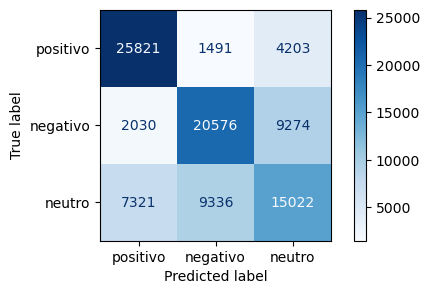

In [32]:
# TESTE
inicio = time.time()
prev_dtreeCV = dtreeCV.predict(xteste)
ac_dtreeCV = accuracy_score(prev_dtreeCV, yteste)
print(f"Acurácia Teste Decision Tree Unigrama-CV: {round(ac_dtreeCV*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_dtreeCV, labels = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(dtreeCV, xteste, yteste, labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm_dtreeCV_ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [33]:
# SALVAR MODELO
dump(dtreeCV, "dtreeCV_ter.pkl")

['dtreeCV_ter.pkl']

#### K-NEAREST NEIGHBOR

In [ ]:
# TREINO
inicio = time.time()
knn = KNeighborsClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid2 = {"n_neighbors": [5,9,15,25,35],
               "weights": ["uniform"],
               "algorithm": ["auto"],
               "leaf_size": [30],
               "p": [2],
               "metric": ["minkowski"]}

# GRID SEARCH
grid2 = GridSearchCV(estimator = knn, 
                     param_grid = param_grid2, 
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

knnCV = grid2.fit(xtreino, ytreino)

ac2 = knnCV.best_score_
print(f"Acurácia: {round(ac2*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", knnCV.best_params_)

In [34]:
# CARREGAR MODELO
knnCV = load('knnCV_ter.pkl')

In [35]:
knnCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 15,
 'p': 2,
 'weights': 'uniform'}

Acurácia Teste KNN Unigrama-CV: 65.13%
Tempo de teste: 21.11 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.69      0.89      0.78     31515
    negativo       0.65      0.70      0.67     31880
      neutro       0.57      0.37      0.45     31679

    accuracy                           0.65     95074
   macro avg       0.64      0.65      0.63     95074
weighted avg       0.64      0.65      0.63     95074



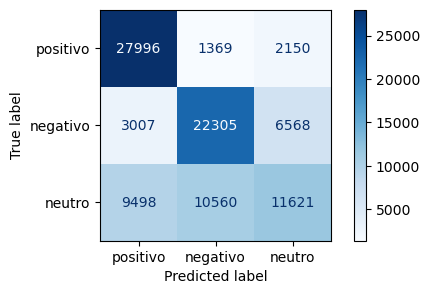

In [36]:
# TESTE
inicio = time.time()
prev_knnCV = knnCV.predict(xteste)
ac_knnCV = accuracy_score(prev_knnCV, yteste)
print(f"Acurácia Teste KNN Unigrama-CV: {round(ac_knnCV*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_knnCV, labels = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(knnCV, xteste, yteste, labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm_knnCV_ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [37]:
# SALVAR MODELO
dump(knnCV, "knnCV_ter.pkl")

['knnCV_ter.pkl']

#### NAIVE BAYES

In [ ]:
# TREINO
inicio = time.time()
nb = MultinomialNB()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid3 = {"alpha": [1.0],
               "fit_prior": [True],
               "class_prior": [None]}

# GRID SEARCH
grid3 = GridSearchCV(estimator = nb,
                     param_grid = param_grid3,
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

nbCV = grid3.fit(xtreino, ytreino)


ac3 = nbCV.best_score_
print(f"Acurácia: {round(ac3*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", nbCV.best_params_)

In [38]:
# CARREGAR MODELO
nbCV = load('nbCV_ter.pkl')

Acurácia Teste Naive Bayes Unigrama-CV: 70.81%
Tempo de teste: 0.0 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.78      0.88      0.83     31515
    negativo       0.72      0.70      0.71     31880
      neutro       0.61      0.55      0.57     31679

    accuracy                           0.71     95074
   macro avg       0.70      0.71      0.70     95074
weighted avg       0.70      0.71      0.70     95074



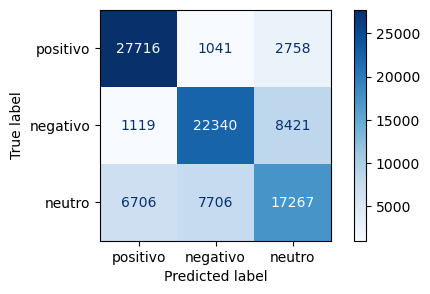

In [39]:
# TESTE
inicio = time.time()
prev_nbCV = nbCV.predict(xteste)
ac_nbCV = accuracy_score(prev_nbCV, yteste)
print(f"Acurácia Teste Naive Bayes Unigrama-CV: {round(ac_nbCV*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_nbCV, labels = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(nbCV, xteste, yteste, labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm_nbCV_ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [40]:
# SALVAR MODELO
dump(nbCV, 'nbCV_ter.pkl')

['nbCV_ter.pkl']

#### XTREME GRADIENT BOOSTING

In [41]:
# FUNÇÃO PARA TRANSFORMAÇÃO DAS CLASSES
def TransformaClasse(array):
    
    for i in range(len(array)):
        if array[i] == "negativo":
            array[i] = 1
        elif array[i] == "positivo":
            array[i] = 0
        else:
            array[i] = 2
    return(array)

In [42]:
ytreino_transf = TransformaClasse(ytreino)
ytreino_xgb = [value for value in ytreino_transf]

In [43]:
yteste_transf = TransformaClasse(yteste)
yteste_xgb = [value for value in yteste_transf]

In [ ]:
# TREINO
inicio = time.time()
xgb_cl = XGBClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid5 = {"n_estimators": [100,300,700,1000,1100],
               "learning_rate": [0.01,0.2,0.3],
               "gamma": [0.2],
               "max_depth": [6],
               "subsample": [0.7],      
               "colsample_bytree": [0.7],
               "reg_alpha": [0.05],
               "objective": ["multi:softmax"]}

# GRID SEARCH
grid5 = GridSearchCV(estimator = xgb_cl, 
                     param_grid = param_grid5, 
                     scoring = "accuracy",
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)


xgbCV = grid5.fit(xtreino, ytreino_xgb)

ac5 = xgbCV.best_score_
print(f"Acurácia: {round(ac5*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", xgbCV.best_params_)

In [44]:
# CARREGAR MODELO
xgbCV = load('xgbCV_ter.pkl')

In [45]:
xgbCV.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 1100,
 'objective': 'multi:softmax',
 'reg_alpha': 0.05,
 'subsample': 0.7}

Acurácia Teste XGBoost Unigrama-CV: 72.81%
Tempo de teste: 0.32 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.79      0.88      0.83     31515
    negativo       0.74      0.74      0.74     31880
      neutro       0.64      0.56      0.60     31679

    accuracy                           0.73     95074
   macro avg       0.72      0.73      0.72     95074
weighted avg       0.72      0.73      0.72     95074



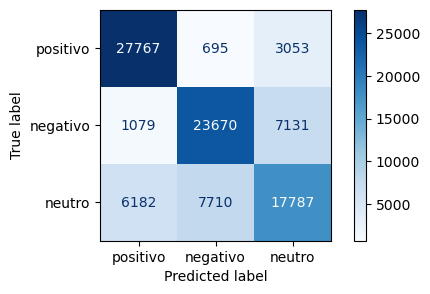

In [46]:
inicio = time.time()
prev_xgbCV = xgbCV.predict(xteste)
ac_xgbCV = accuracy_score(yteste_xgb, prev_xgbCV)
print(f"Acurácia Teste XGBoost Unigrama-CV: {round(ac_xgbCV*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste_xgb, prev_xgbCV, target_names = ["positivo", "negativo", "neutro"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(xgbCV, xteste, yteste_xgb, display_labels = ["positivo", "negativo", "neutro"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm_xgbCV_ter.png', format ='png', bbox_inches = 'tight')
plt.show()

In [47]:
# SALVAR MODELO
dump(xgbCV, "xgbCV_ter.pkl")

['xgbCV_ter.pkl']